### Semana 06 - lec03 - fraco número de amostras

  - Porque amostra < 10 amostra é um crime, por vezes necessário.


### Distribuição normal centrada em 2.5 com SSD = .5

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

In [2]:
N = 1000
MU = 2.5; SD = 0.5
x = np.random.normal(MU, SD, N)

mu  = np.mean(x)
med = np.median(x)
ssd = np.std(x)
vc  = ssd/mu

mu, med, ssd, vc

(2.502337043657094, 2.493164666438548, 0.5028689815044302, 0.20095973193503203)

(0.49086111763937357, 4.513812969674815)

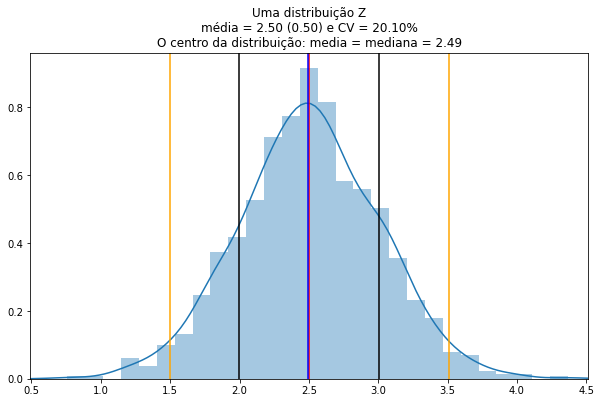

In [15]:
title = "Uma distribuição Normal (ou Gaussiana)\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, ssd, vc*100)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med)

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(x, hist=True, kde=True)
ax.axvline(mu, color='red')
ax.axvline(med, color='blue')
ax.axvline(mu+1*ssd, color='black')
ax.axvline(mu-1*ssd, color='black')
ax.axvline(mu+2*ssd, color='orange')
ax.axvline(mu-2*ssd, color='orange')
ax.set_title(title)
ax.set_xlim(mu-4*ssd, mu+4*ssd)

In [14]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(x)

print('stat=%.3f, p-value=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
'Mean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(x), vc)

stat=0.999, p-value=0.968
Probably Gaussian


'Mean = 2.50 median  = 2.49 SSD = 0.50, n = 1000, and VC = 0.20'

### Distribuição Z - distribuião normal qualqer standarizada

In [10]:
# centralizando em Zero
print('centralizo', np.mean(x-mu))
print('normalizo o desvio padrão', np.std((x-mu)/ssd))

x2 = (x-mu)/ssd

mu2  = np.mean(x2)
med2 = np.median(x2)
ssd2 = np.std(x2)
vc2  = ssd2/mu2

centralizo -4.39648317751562e-16
normalizo o desvio padrão 1.0


(-4.000000000000001, 6.502337043657095)

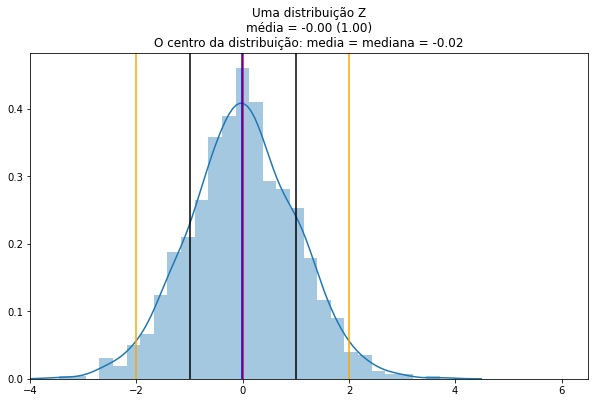

In [16]:
title = "Uma distribuição Z\nmédia = %.2f (%.2f)"%(mu2, ssd2)
title += "\nO centro da distribuição: media = mediana = %.2f"%(med2)

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(x2, hist=True, kde=True)
ax.axvline(mu2, color='red')
ax.axvline(med2, color='blue')
ax.axvline(mu2+1*ssd2, color='black')
ax.axvline(mu2-1*ssd2, color='black')
ax.axvline(mu2+2*ssd2, color='orange')
ax.axvline(mu2-2*ssd2, color='orange')
ax.set_title(title)
ax.set_xlim(mu2-4*ssd2, mu+4*ssd2)

### Amostragem

#### agora vamos simular um experimento no lab com somente 3 amostras!

n baixo - você pode ficar próximo da média ou longe dela  
        - você sempre subestima o SSD

In [31]:
Nlab = 3
# N = 1000
MU = 2.5; SD = 0.5
x = np.random.normal(MU, SD, Nlab)

muLab  = np.mean(x)
medLab = np.median(x)
ssdLab = np.std(x)
vcLab  = ssdLab/muLab

print(muLab, medLab, ssdLab, vcLab)
# print((muLab-mu), (medLab - med), (ssdLab - ssd), (vcLab - vc))
print("Erro de media = %.1f%%, mediana = %.1f%%, SSD = %.1f%%, VC = %.1f%%"%(100*(muLab-mu)/mu, 100*(medLab - med)/med, 100*(ssdLab - ssd)/ssd, 100*(vcLab - vc)/vc))

2.6824925846465697 2.8741678226030145 0.4006117380301887 0.1493430924369064
Erro de media = 7.2%, mediana = 15.3%, SSD = -20.3%, VC = -25.7%


### Agora vamos analisar o erro e desvio padrão amostral médio

In [32]:
iloop = 50
muLabs=[]; medLabs=[]; ssdLabs=[]; vcLabs=[]; xs=[]
print(Nlab)

for i in range(iloop):
    x = np.random.normal(MU, SD, Nlab)

    muLab  = np.abs(np.mean(x))
    medLab = np.abs(np.median(x))
    ssdLab = np.abs(np.std(x))
    vcLab  = np.abs(ssdLab/muLab)

    muLabs.append(muLab)
    medLabs.append(medLab)
    ssdLabs.append(ssdLab)
    vcLabs.append(vcLab)
    xs.append(x)
    

3


In [33]:
"Erro de media = %.1f%%, mediana = %.1f%%, SSD = %.1f%%, VC = %.1f%%"%(
    100*(np.mean(muLabs)  - mu) /mu,  100*(np.mean(medLabs) - med)/med, 
    100*(np.mean(ssdLabs) - ssd)/ssd, 100*(np.mean(vcLabs)  - vc)/vc)

'Erro de media = 0.2%, mediana = 0.7%, SSD = -32.2%, VC = -32.4%'

### Qual o problema??

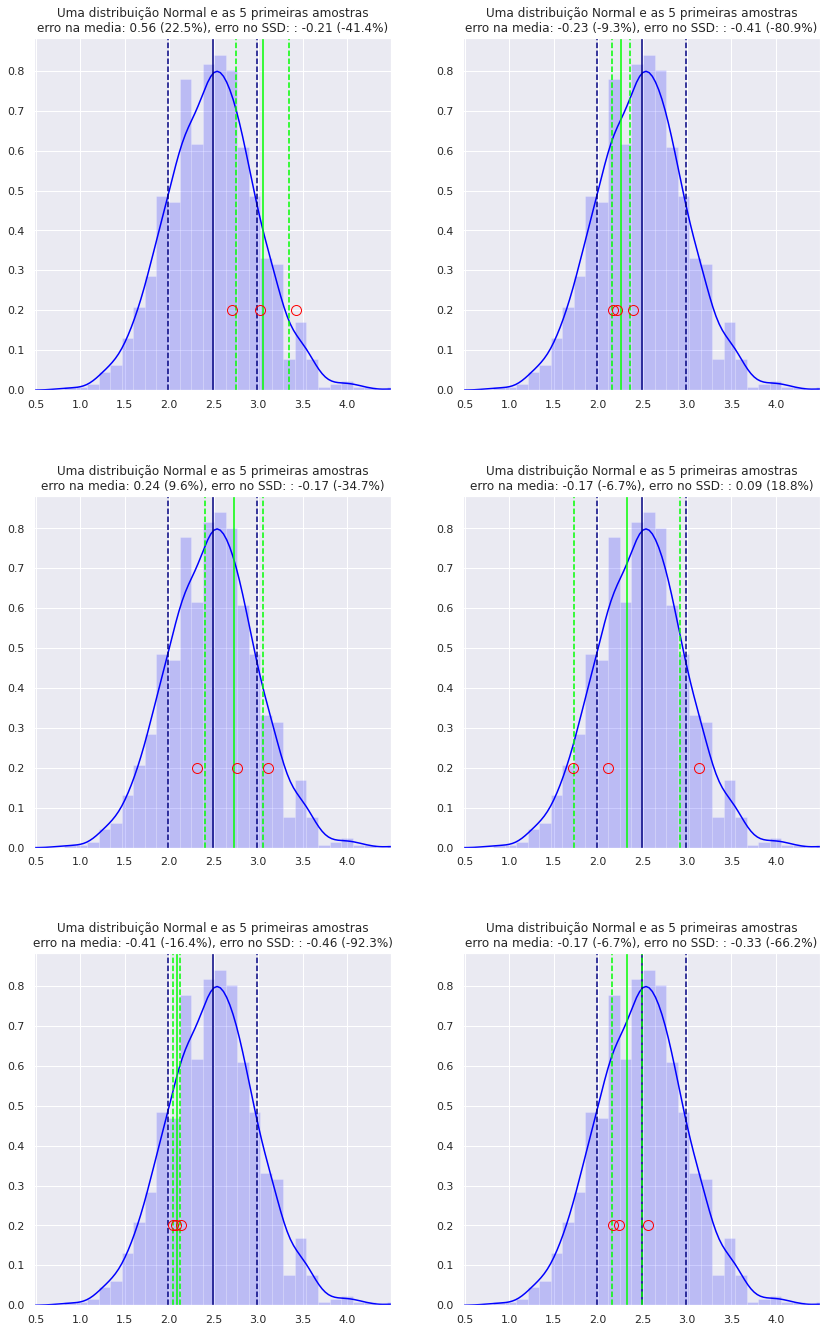

In [34]:
from pylab import subplot

N = 1000
MU = 2.5; SD = 0.5
x = np.random.normal(MU, SD, N)

mu  = np.mean(x)
med = np.median(x)
ssd = np.std(x)
vc  = ssd/mu

# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors2 = ['yellow', 'red', 'brown', 'blue', 'darkviolet', 'lime']
colors = ['lime']*6

sns.set(rc={"figure.figsize": (14,22)})

title = "Uma distribuição Normal e as 5 primeiras amostras"

nfig = 0
for i in range(6):
    nfig += 1
    subplot(3,2,nfig)
        
    ax = sns.distplot(x, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.2))
    ax.axvline(mu, color='navy')
    ax.axvline(mu+1*ssd, color='navy', linestyle='--')
    ax.axvline(mu-1*ssd, color='navy', linestyle='--')

    mu2  = muLabs[i]
    ssd2 = ssdLabs[i]
    
    ax.axvline(mu2, color=colors[i])
    ax.axvline(mu2+1*ssd2, color=colors[i], linestyle='--')
    ax.axvline(mu2-1*ssd2, color=colors[i], linestyle='--')
        
    ax.set_xlim(mu-4*ssd, mu+4*ssd)
    
    #--- eache point in a circle
    xcircle = xs[i]
    
    for j in range(len(xcircle)):
        ax.plot(xcircle[j], 0.2, 'o', ms=10, mec='red',mfc='none')

        
    emu = mu2 - mu
    essd = ssd2 - ssd
    
    p_emu  = 100*(mu2 - mu)/mu
    p_essd = 100*(ssd2 - ssd)/ssd

    title2 = title + "\nerro na media: %.2f (%.1f%%), erro no SSD: : %.2f (%.1f%%)"%(emu, p_emu, essd, p_essd)
    
    plt.title(title2)
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)  

### Qual o problema??

### Simulação de SEM

porque p-value < 0.05 --> existe diferença estatística !!! ### ERRADO ###  

  - número amostral
  - correção de t-student
  - avaliar normalidade
  - tamanho do efeito
  - intervalo de confiança
    - controle \[ 28 - 32] (pmol)
    - case     \[ 32 - 36] (pmol)
    - t-student --> diferenca(case e controle)
    - o intarvalo de confiança da diferença se afasta muito do zero
    - vamos supor que diferença (min) se afasta 3 pmol do zero (estati// diferente)
    - 3 pmol é suficente para um efeito biológico?
      - sim -- você pode falar em estatística
      - não / não sei: não use o resultado estatístico
      

In [37]:
SSD = 0.5

In [38]:
np.sqrt(3), SSD/np.sqrt(3)

(1.7320508075688772, 0.2886751345948129)

In [39]:
np.sqrt(5), SSD/np.sqrt(5)

(2.23606797749979, 0.22360679774997896)

In [40]:
np.sqrt(10), SSD/np.sqrt(10)

(3.1622776601683795, 0.15811388300841897)

In [41]:
np.sqrt(30), SSD/np.sqrt(30)

(5.477225575051661, 0.09128709291752768)